<a href="https://colab.research.google.com/github/ducnguyen1704/pandas2/blob/master/Pandas2_OnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Bài tập] Phân tích trên bộ dữ liệu Online Retail

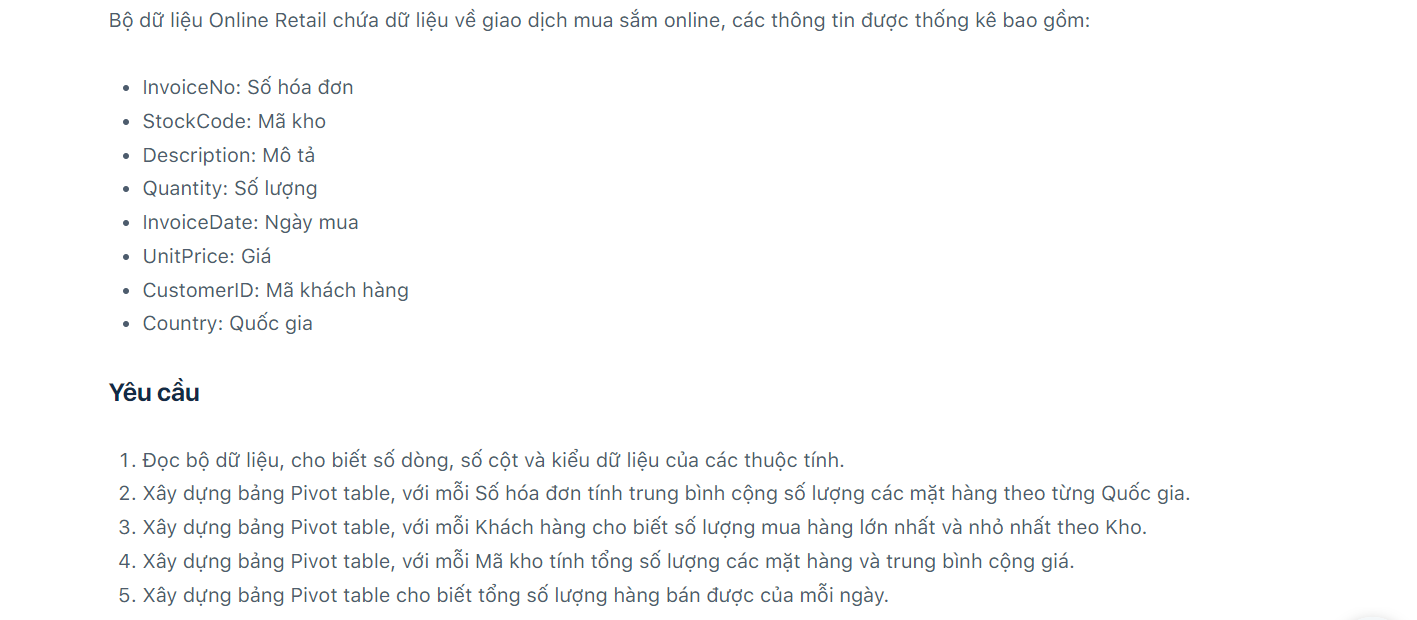

## 1. Đọc bộ dữ liệu, cho biết số dòng, số cột và kiểu dữ liệu của các thuộc tính.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv', encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Bộ dữ liệu online retail gồm 541909 dòng với 8 cột

## 2. Xây dựng bảng Pivot table, với mỗi Số hóa đơn tính trung bình cộng số lượng các mặt hàng theo từng Quốc gia. 

In [11]:
data.pivot_table(values='Quantity', index='InvoiceNo',columns='Country', aggfunc='mean')

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,EIRE,European Community,Finland,France,Germany,Greece,Hong Kong,Iceland,Israel,Italy,Japan,Lebanon,Lithuania,Malta,Netherlands,Norway,Poland,Portugal,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.714286,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.916667,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.750000,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80995.000000,NaN
C581490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.500000,NaN
C581499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN


## 3. Xây dựng bảng Pivot table, với mỗi Khách hàng cho biết số lượng mua hàng lớn nhất và nhỏ nhất theo Kho.

In [12]:
data.pivot_table(values='Quantity', index='CustomerID', columns='StockCode', aggfunc=['max','min'])

max                                   ...  min                       
StockCode  10002 10080 10120 10123C 10124A 10124G  ... CRUK   D DOT    M PADS POST
CustomerID                                         ...                            
12346.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  NaN
12347.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  NaN
12348.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  1.0
12349.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  1.0
12350.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  1.0
...          ...   ...   ...    ...    ...    ...  ...  ...  ..  ..  ...  ...  ...
18280.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  NaN
18281.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  NaN
18282.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  NaN
18283.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  1.0  NaN  NaN
18287.0      NaN   NaN   NaN    NaN    NaN    NaN  ...  NaN NaN NaN  NaN  NaN  NaN

[4372 rows x 7368 columns]

## 4. Xây dựng bảng Pivot table, với mỗi Mã kho tính tổng số lượng các mặt hàng và trung bình cộng giá.

In [15]:
data.pivot_table(values=['Quantity','UnitPrice'], index='StockCode', aggfunc={'Quantity':np.sum,'UnitPrice':np.mean})

,Quantity,UnitPrice
StockCode,,
10002,1037,1.056849
10080,495,0.376667
10120,193,0.210000
10123C,-13,0.487500
10123G,-38,0.000000
...,...,...
gift_0001_20,20,15.038000
gift_0001_30,37,21.941250
gift_0001_40,3,33.566667


## 5. Xây dựng bảng Pivot table cho biết tổng số lượng hàng bán được của mỗi ngày.

In [16]:
data.pivot_table(values='Quantity', index='InvoiceDate', aggfunc='sum')

,Quantity
InvoiceDate,
1/10/2011 10:04,-29
1/10/2011 10:07,-4
1/10/2011 10:08,-14
1/10/2011 10:32,260
1/10/2011 10:35,408
...,...
9/9/2011 8:48,104
9/9/2011 9:03,105
9/9/2011 9:13,372
